In [ ]:
import pandas as pd
import numpy as np
from jax import jit, vmap
from functools import partial
from tqdm import tqdm
import jax.numpy as jnp 

%pylab inline
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 20})

wealthGrid = jnp.linspace(0, 300, 600)

In [ ]:
agentType = "richLow"
beta_r = 0.02
gamma = 4.0

from shutDownHousing.solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition6 = [wealthGrid[jnp.argmax(act[:,2]>0)] for act in ageDependentActions]

In [ ]:
from solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)
    
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition1 = [wealthGrid[jnp.argmax(act[:,2]>0)] for act in ageDependentActions]

In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, employed, no experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition2 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]

In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition3 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]

In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 1
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition4 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]

In [ ]:
from shutDownRetirement.solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition5 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]

In [ ]:
from matplotlib import pyplot as plt


plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + housing option")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition6[:-1], label = "renter+ no housing option")
plt.legend()

In [ ]:
from matplotlib import pyplot as plt


plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary1.jpg")

In [ ]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + housing option")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition6[:-1], label = "renter")
plt.legend()

In [ ]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary2.jpg")

In [ ]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary3.jpg")

In [ ]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary4.jpg")

In [ ]:
agentType = "richLow"
beta_r = 0.02
gamma = 4.0
from solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)


In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(29)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition1 = [wealthGrid[jnp.argmax(act[:,4]==1)] for act in ageDependentActions]

In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(29)):
    
    # condition on no house, employed, no experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition2 = [wealthGrid[jnp.argmax(act[:,4]==1)] for act in ageDependentActions]

In [ ]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(29)):
    
    # condition on no house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition3 = [wealthGrid[jnp.argmax(act[:,4]==1)] for act in ageDependentActions]

In [ ]:
from shutDownRetirement.solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(29)):
    
    # condition on no house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition4 = [wealthGrid[jnp.argmax(act[:,4]==1)] for act in ageDependentActions]

In [ ]:
plt.title("housing decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 29), wealthBoundaryParticipationDecision_condition1, label = "renter + 401k")
plt.plot(range(20, 20 + 29), wealthBoundaryParticipationDecision_condition2, label = "renter + 401k + employed")
plt.plot(range(20, 20 + 29), wealthBoundaryParticipationDecision_condition3, label = "renter + 401k + employed + experience")
plt.plot(range(20, 20 + 29), wealthBoundaryParticipationDecision_condition4, label = "renter")
plt.legend()

In [17]:
agentType = "richLow"
beta_r = 0.02
gamma = 4.0

from shutDownHousing.solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 0
    w = 100 
    Xs = jnp.array([w,ab,s,e,o,z])
    act = partial(actions,t)(Xs)
    ageDependentActions.append(act)
ageDependentActions = jnp.array(ageDependentActions) 
consumption = ageDependentActions[:,0]

100%|██████████| 59/59 [01:33<00:00,  1.59s/it]


In [18]:
from solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)
    
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 0
    w = 100 
    Xs = jnp.array([w,ab,s,e,o,z])
    act = partial(actions,t)(Xs)
    ageDependentActions.append(act)
ageDependentActions = jnp.array(ageDependentActions) 
consumption_bench = ageDependentActions[:,0]

100%|██████████| 59/59 [01:33<00:00,  1.58s/it]


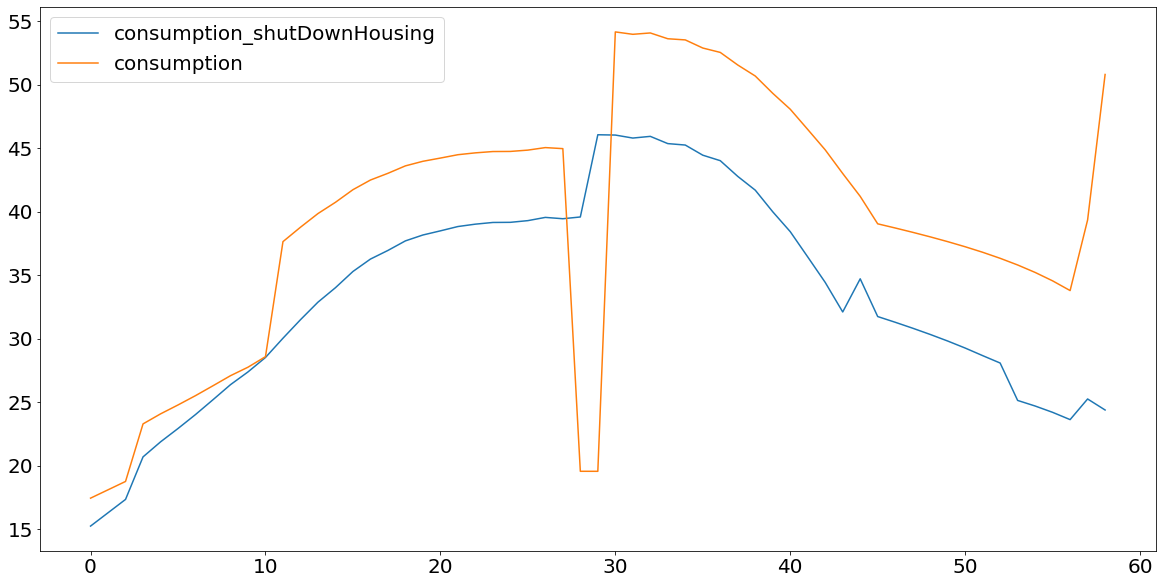

In [21]:
plt.plot(consumption, label = "consumption_shutDownHousing")
plt.plot(consumption_bench, label = "consumption")
plt.legend()